<a href="https://colab.research.google.com/github/sulistiahrr/DataMining/blob/main/SulistiaHertiRiana_221011402659_04TPLE018_DataMining_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile

with zipfile.ZipFile('archive.zip','r') as zip_ref:
  zip_ref.extractall('/content/')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
df = pd.read_csv('/content/places_to_eat_in_the_jogja_region.csv')
display(df.head(2))
display(df.tail(2))
display(df.sample(4))

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte
0,"Mie Bandung Chinese Food, Ngampilan",Chinese,3.23 km,39000,4.7,Santai,Tidak,"Bakmie, Aneka nasi, Chinese",Tidak,3,3,Disajikan,Ala Carte
1,"Soto Tauco Pekalongan Bu Iswi, Jalan Bimokurdo...",Indonesia,3.01 km,19000,3.7,Santai,Tidak,"Bakso & soto, Cepat saji, Minuman",Tidak,2,2,Disajikan,Ala Carte


,Nama Restoran,Preferensi Makanan,Lokasi Restoran,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte
289,"Burgerax, Patangpuluhan",Western,4.59 km,38000,4.7,Santai,Tidak,"Western, Snacks, Fast food",Tidak,4,3,Disajikan,Ala Carte
290,"Shaburi & Kintan Buffet, Ambarukmo Plaza Yogya",Japanese,3.67 km,330000,4.8,Formal,Tidak,"Japanese, Rice, Chicken & duck",Tidak,1,2,Ambil Sendiri,All You Can Eat


,Nama Restoran,Preferensi Makanan,Lokasi Restoran,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Jenis Suasana,Toko Sering Diskon (Ya/Tidak),Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte
15,"Soto Pak Zaenal Barokah, Warungboto Umbulharjo",Indonesia,0.65 km,15000,4.5,Santai,Tidak,"Minuman, Bakso & soto",Tidak,4,2,Disajikan,Ala Carte
63,"Nikkou Ramen, Pakualaman",Japanese,1.64 km,32000,4.2,Santai,Tidak,"Rice, Noodles, Japanese",Tidak,4,3,Disajikan,Ala Carte
211,"Nasi Mangkok Uncle Dave, Depok/Caturtunggal/Se...",Japanese,5.89 km,21000,4.6,Santai,Tidak,"Rice, Fast food, Japanese",Tidak,3,1,Disajikan,Ala Carte
51,"Seafood 99, Wonocatur",Chinese,2.33 km,23000,4.7,Santai,Tidak,"Chinese, Seafood, Aneka nasi",Tidak,1,1,Disajikan,Ala Carte


# **3.1 The shape of the dataset**

In [6]:
#number of rows and colums
df.shape

(291, 13)

# **3.2 List types of all coloumns**

In [7]:
df.dtypes

Nama Restoran                            object
Preferensi Makanan                       object
Lokasi Restoran                          object
Harga Rata-Rata Makanan di Toko (Rp)      int64
Rating Toko                             float64
Jenis Suasana                            object
Toko Sering Diskon (Ya/Tidak)            object
Variasi Makanan                          object
Pelayanan Khusus Pasangan (Ya/Tidak)     object
Entertainment                             int64
Keramaian Restoran                        int64
Disajikan atau Ambil Sendiri             object
All You Can Eat atau Ala Carte           object
dtype: object

# **3.3 Info of the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Nama Restoran                         291 non-null    object 
 1   Preferensi Makanan                    291 non-null    object 
 2   Lokasi Restoran                       291 non-null    object 
 3   Harga Rata-Rata Makanan di Toko (Rp)  291 non-null    int64  
 4   Rating Toko                           291 non-null    float64
 5   Jenis Suasana                         291 non-null    object 
 6   Toko Sering Diskon (Ya/Tidak)         291 non-null    object 
 7   Variasi Makanan                       291 non-null    object 
 8   Pelayanan Khusus Pasangan (Ya/Tidak)  291 non-null    object 
 9   Entertainment                         291 non-null    int64  
 10  Keramaian Restoran                    291 non-null    int64  
 11  Disajikan atau Ambi

# **3.4 Summary of the dataset**

In [9]:
df.describe()

,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Entertainment,Keramaian Restoran
count,291.000000,291.000000,291.000000,291.000000
mean,38766.323024,4.547423,2.518900,2.061856
std,28509.896041,0.262518,1.118259,0.798461
min,10000.000000,3.400000,1.000000,1.000000
25%,22000.000000,4.500000,2.000000,1.000000
50%,31000.000000,4.600000,3.000000,2.000000
75%,44500.000000,4.700000,3.500000,3.000000
max,330000.000000,4.900000,4.000000,3.000000


## **4. Data Cleaning**

# **4.1 Drp The Duplicte**

In [10]:
# check the shape before drop duplicate
df.shape

(291, 13)

In [11]:
df=df .drop_duplicates()

In [12]:
# check the shape after drop duplicate
df.shape

(291, 13)

# **4.2 Check The NULL Value**

In [13]:
# check of null value,
# check the missing value in any column,
# display number of null value in every column in dataset.
df .isnull().sum()

Nama Restoran                           0
Preferensi Makanan                      0
Lokasi Restoran                         0
Harga Rata-Rata Makanan di Toko (Rp)    0
Rating Toko                             0
Jenis Suasana                           0
Toko Sering Diskon (Ya/Tidak)           0
Variasi Makanan                         0
Pelayanan Khusus Pasangan (Ya/Tidak)    0
Entertainment                           0
Keramaian Restoran                      0
Disajikan atau Ambil Sendiri            0
All You Can Eat atau Ala Carte          0
dtype: int64

In [14]:
df .columns

Index(['Nama Restoran', 'Preferensi Makanan', 'Lokasi Restoran',
       'Harga Rata-Rata Makanan di Toko (Rp)', 'Rating Toko', 'Jenis Suasana',
       'Toko Sering Diskon (Ya/Tidak)', 'Variasi Makanan',
       'Pelayanan Khusus Pasangan (Ya/Tidak)', 'Entertainment',
       'Keramaian Restoran', 'Disajikan atau Ambil Sendiri',
       'All You Can Eat atau Ala Carte'],
      dtype='object')

# **check the not .of Zero value in dataset**

In [15]:
print ('No of zero value in Nama Restoran', df[df['Nama Restoran']==0].shape[0])

No of zero value in Nama Restoran 0


In [16]:
print ('No of zero value in Preferensi Makanan', df[df['Preferensi Makanan']==0].shape[0])

No of zero value in Preferensi Makanan 0


In [17]:
print ('No of zero value in Lokasi Restoran', df[df['Lokasi Restoran']==0].shape[0])

No of zero value in Lokasi Restoran 0


In [18]:
print ('No of zero value in Harga Rata-Rata Makanan di Toko (Rp)', df[df['Harga Rata-Rata Makanan di Toko (Rp)']==0].shape[0])

No of zero value in Harga Rata-Rata Makanan di Toko (Rp) 0


In [19]:
print ('No of zero value in Rating Toko', df[df['Rating Toko']==0].shape[0])

No of zero value in Rating Toko 0


# **Replace the not .of Zero value with mean of columns**

In [20]:
df['Harga Rata-Rata Makanan di Toko (Rp)']=df['Harga Rata-Rata Makanan di Toko (Rp)'].replace(0,df['Harga Rata-Rata Makanan di Toko (Rp)'].mean())
print ('No of zero value in Harga Rata-Rata Makanan di Toko (Rp)', df[df['Harga Rata-Rata Makanan di Toko (Rp)']==0].shape[0])

No of zero value in Harga Rata-Rata Makanan di Toko (Rp) 0


In [23]:
df['Entertainment']=df['Entertainment'].replace(0,df['Entertainment'].mean())
df['Keramaian Restoran']=df['Keramaian Restoran'].replace(0,df['Keramaian Restoran'].mean())
df['Rating Toko']=df['Rating Toko'].replace(0,df['Rating Toko'].mean())

In [24]:
df.describe()

,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Entertainment,Keramaian Restoran
count,291.000000,291.000000,291.000000,291.000000
mean,38766.323024,4.547423,2.518900,2.061856
std,28509.896041,0.262518,1.118259,0.798461
min,10000.000000,3.400000,1.000000,1.000000
25%,22000.000000,4.500000,2.000000,1.000000
50%,31000.000000,4.600000,3.000000,2.000000
75%,44500.000000,4.700000,3.500000,3.000000
max,330000.000000,4.900000,4.000000,3.000000


Negative (0): 230
Positive (1): 61


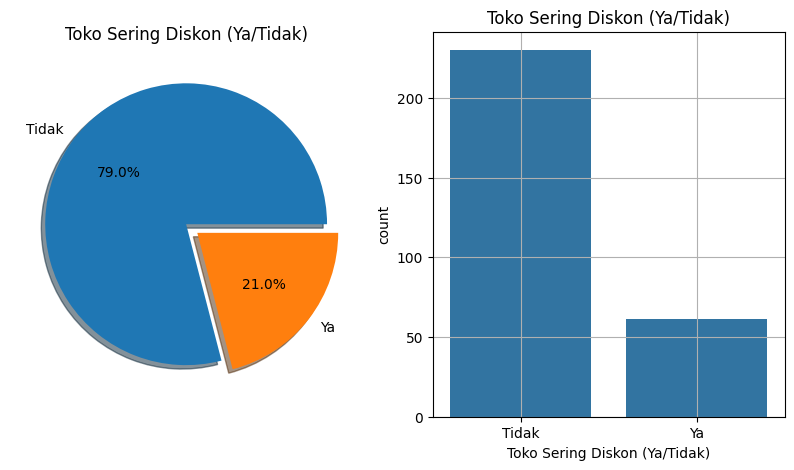

In [38]:
# utcome count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Toko Sering Diskon (Ya/Tidak)'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Toko Sering Diskon (Ya/Tidak)')
ax[0].set_ylabel('')
sns.countplot(x='Toko Sering Diskon (Ya/Tidak)',data=df,ax=ax[1])
ax[1].set_title('Toko Sering Diskon (Ya/Tidak)')
N,P = df['Toko Sering Diskon (Ya/Tidak)'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()

# **Histogram of each feature**

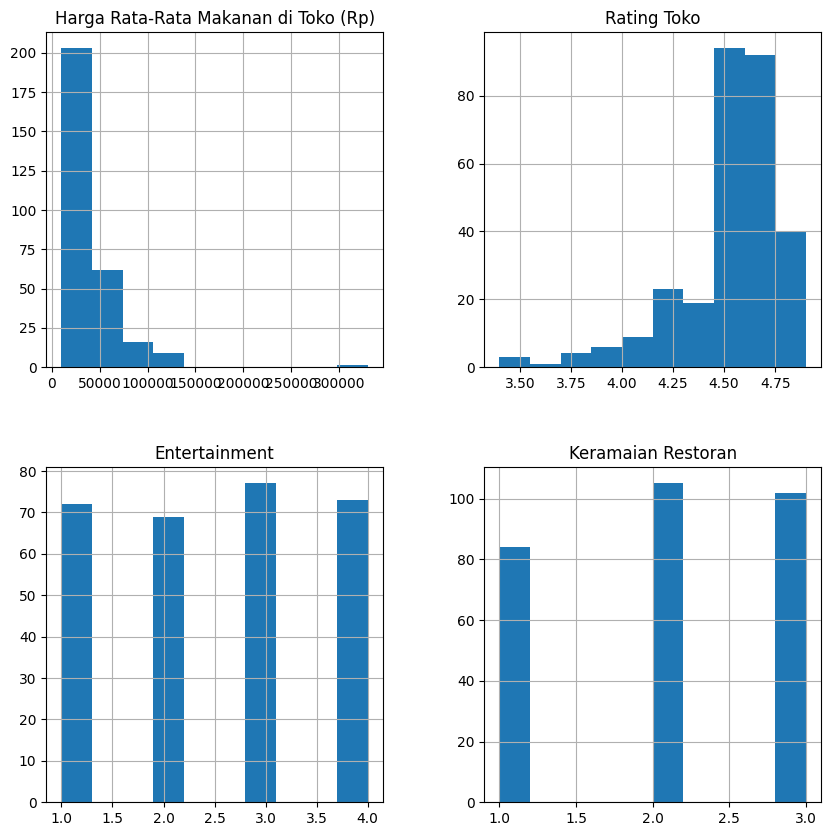

In [39]:
df.hist(bins=10,figsize=(10,10))
plt.show()

# **Scatter Plaot**

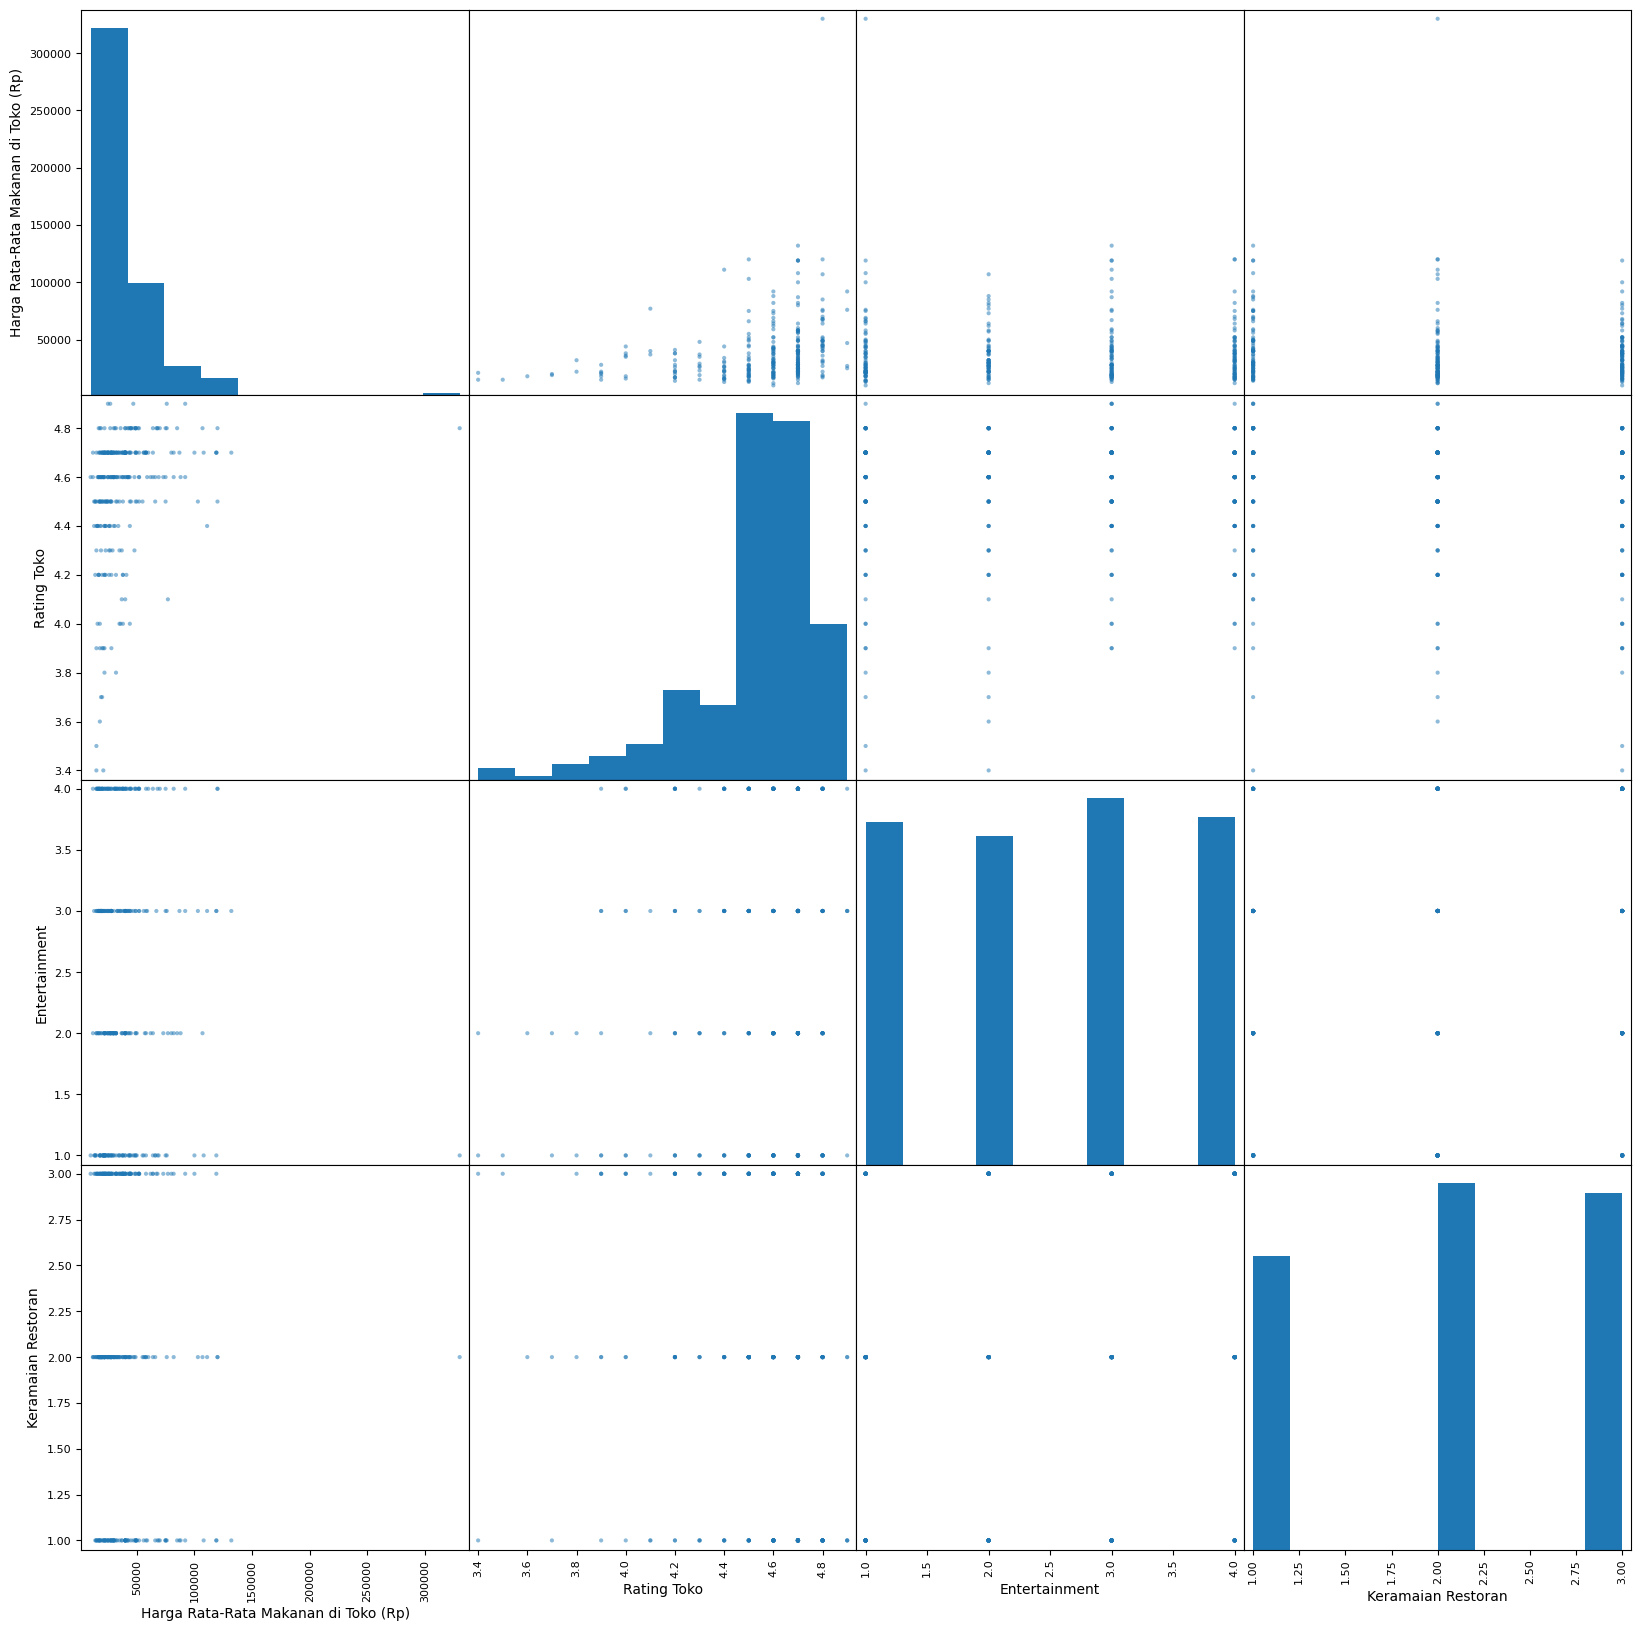

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

# **Analyzing relationships between variable**

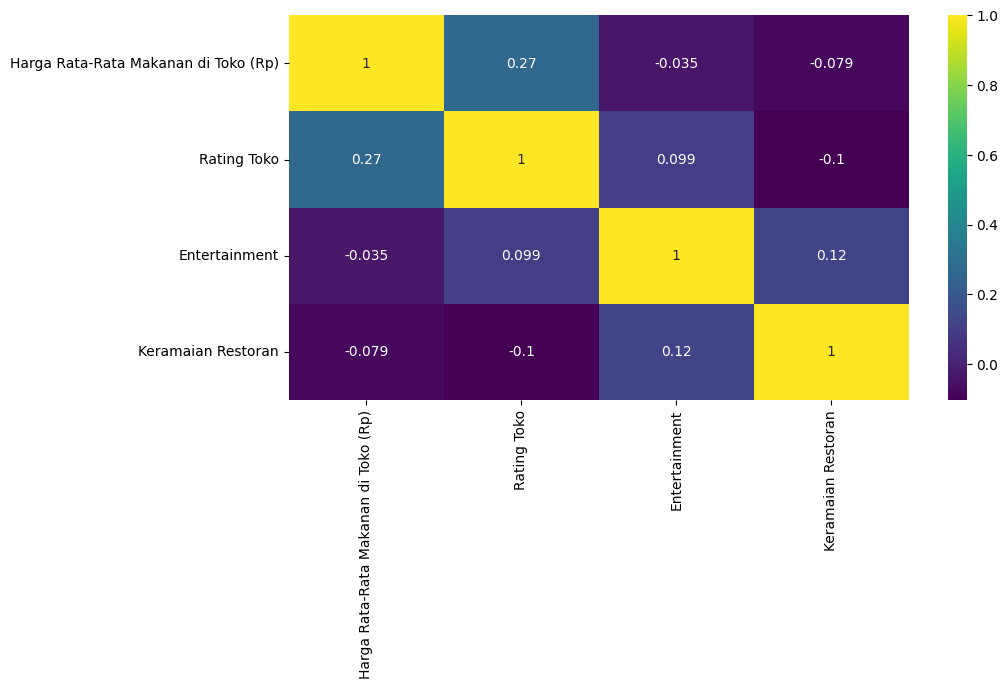

In [48]:
import seaborn as sns
numerical_features = ['Harga Rata-Rata Makanan di Toko (Rp)', 'Rating Toko', 'Entertainment','Keramaian Restoran']
df_numerical = df[numerical_features]
corrmat = df_numerical.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
g=sns.heatmap(df_numerical[top_corr_features].corr(), annot=True, cmap="viridis")

# **5. Split the data frame into X & Y**

In [49]:
target_name = 'Toko Sering Diskon (Ya/Tidak)'
y = df[target_name]
x = df.drop(target_name, axis=1)

In [50]:
x.head()

,Nama Restoran,Preferensi Makanan,Lokasi Restoran,Harga Rata-Rata Makanan di Toko (Rp),Rating Toko,Jenis Suasana,Variasi Makanan,Pelayanan Khusus Pasangan (Ya/Tidak),Entertainment,Keramaian Restoran,Disajikan atau Ambil Sendiri,All You Can Eat atau Ala Carte
0,"Mie Bandung Chinese Food, Ngampilan",Chinese,3.23 km,39000,4.7,Santai,"Bakmie, Aneka nasi, Chinese",Tidak,3,3,Disajikan,Ala Carte
1,"Soto Tauco Pekalongan Bu Iswi, Jalan Bimokurdo...",Indonesia,3.01 km,19000,3.7,Santai,"Bakso & soto, Cepat saji, Minuman",Tidak,2,2,Disajikan,Ala Carte
2,"Spesial Bakso Pak Jum Balai Kota, Umbulharjo",Indonesia,1.44 km,18000,3.6,Santai,"Bakso & soto, Jajanan, Minuman",Tidak,2,2,Disajikan,Ala Carte
3,Soto Ayam Kampung Dan Soto Daging Sapi Pak Ben,Indonesia,0.83 km,22000,3.8,Santai,"Bakso & soto, Minuman",Tidak,1,2,Disajikan,Ala Carte
4,Toba Tabo,Chinese,2.13 km,40000,4.7,Santai,"Cepat saji, Bakmie, Chinese",Tidak,1,3,Disajikan,Ala Carte


In [51]:
y.head()

0    Tidak
1    Tidak
2    Tidak
3    Tidak
4    Tidak
Name: Toko Sering Diskon (Ya/Tidak), dtype: object



```
# Ini diformat sebagai kode
```

# **6. Apply Features Scalling**

In [53]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Harga Rata-Rata Makanan di Toko (Rp)', 'Rating Toko', 'Entertainment','Keramaian Restoran']
x_numerical = x[numerical_features]
scaler.fit(x_numerical)
SSX = scaler.transform(x_numerical)

# **7. Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [55]:
x_train.shape, y_train.shape

((232, 4), (232,))

In [56]:
x_test.shape, y_test.shape

((59, 4), (59,))

# **8. Build the Classification Algorithms SVM**

In [57]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

# **9. Making Prediction**

9.4) SVM

In [58]:
sv_pred=sv.predict(x_test)

In [59]:
sv_pred.shape

(59,)

# **10) Model Evaluation**

# **10.1) Train Score and Test Score**

In [60]:
#Train score & test score SVN
from sklearn.metrics import accuracy_score
print ("Train Accuracy of SVM",sv.score(x_train, y_train)*100)
print ("Accuracy (test) score of SVM", sv.score(x_test, y_test)*100)
print ("Accuracy (test) score of SVM", accuracy_score (y_test, sv_pred)*100)

Train Accuracy of SVM 78.44827586206897
Accuracy (test) score of SVM 81.35593220338984
Accuracy (test) score of SVM 81.35593220338984


ROC Curve & ROC AUC ROC curve is one the import evaluating metrics that should be used to check performance of clasification model. it is also called relative operating characteristic curve, because is a comparison of two main characteristics (TPR & FBR). It is plotted between sensitivity (aka recall aka True Positive Rate) and False Positive Rate (FBR = 1 -spesificisty). ROC(Receciver Operating Characteristic) Curve tells about how good the model can distinguish between two thing . AUC(Area Under Cruve) helps us to choose the best model amongst the model for which we have plotted the ROC curves

# **Confusion Matrix of "SVM"**

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion matrix of Logistic Regression
cm=confusion_matrix(y_test,sv_pred)
cm

array([[48,  0],
       [11,  0]])

<Axes: >

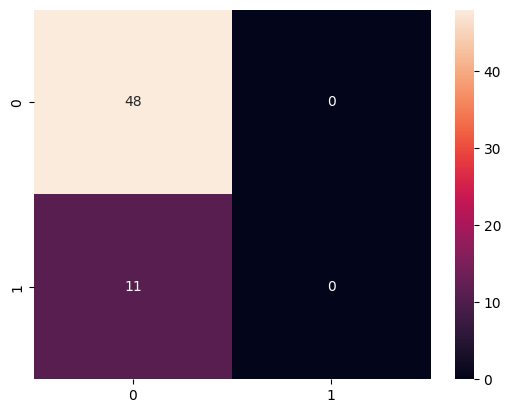

In [62]:
sns.heatmap(confusion_matrix(y_test, sv_pred),annot=True,fmt='d')

In [63]:
print ( 'Classifiaction Report of SVM: \n',	classification_report (y_test,sv_pred,digits=4))

Classifiaction Report of SVM: 
               precision    recall  f1-score   support

       Tidak     0.8136    1.0000    0.8972        48
          Ya     0.0000    0.0000    0.0000        11

    accuracy                         0.8136        59
   macro avg     0.4068    0.5000    0.4486        59
weighted avg     0.6619    0.8136    0.7299        59



In [64]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [65]:
TN, FP, FN, TP

(48, 0, 11, 0)

In [66]:
# Making the Confusion matrix of SVN
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, sv_pred)
cm

array([[48,  0],
       [11,  0]])

In [67]:
# Making the confusion matrix of SWvm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, sv_pred)

In [68]:
print ('TN - True Negative {}'. format(cm[0,0]))
print ('TP - True Positive {}'. format(cm[0,1]))
print ('FN - False Negative {}'. format(cm[1,0]))
print ('TP - True Positive {}'. format(cm[1,1]))
print( 'Accuracy Rate of SVM:{}'. format(np.divide(np.sum([cm[0,0],cm[0,1]]),np.sum(cm))*100))
print( 'Misclassification Rate of SVM:{}'. format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 48
TP - True Positive 0
FN - False Negative 11
TP - True Positive 0
Accuracy Rate of SVM:81.35593220338984
Misclassification Rate of SVM:18.64406779661017


<Axes: >

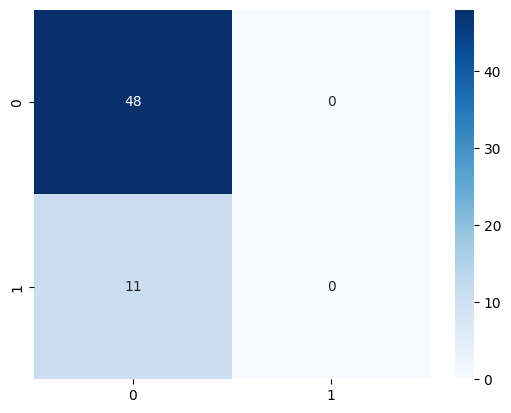

In [71]:
sns.heatmap(confusion_matrix(y_test, sv_pred), cmap='Blues', annot=True, fmt="d")

# **Classification Report of SVM**

In [72]:
print( 'Classification Report of SVM: \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM: 
               precision    recall  f1-score   support

       Tidak     0.8136    1.0000    0.8972        48
          Ya     0.0000    0.0000    0.0000        11

    accuracy                         0.8136        59
   macro avg     0.4068    0.5000    0.4486        59
weighted avg     0.6619    0.8136    0.7299        59



In [73]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [74]:
TN, FP, FN, TP

(48, 0, 11, 0)

In [75]:
# PRECISION (PPV-Positive Prediction Value)
# Precision = TP/(TP+FP), Where TP = True Positive, FP	= False Positive
TP,FP

(0, 0)

In [76]:
Precision=TP/(TP+FP)
Precision

nan

In [77]:
precision_score = TP/float(TP+FP)*100
print( 'Precision Score : {0:0.4f}'.format(precision_score))

Precision Score : nan


In [85]:
from sklearn.metrics import precision_score
y_test = [0, 1, 1, 0, 1]
sv_pred = [0, 1, 0, 1, 1]
precision = precision_score(y_test, sv_pred)*100
print("Precision Score is:", precision)
micro_avg_precision = precision_score(y_test, sv_pred, average='micro')*100
print("Micro Average precision Score is:", micro_avg_precision)
macro_avg_precision = precision_score(y_test, sv_pred, average='macro')*100
print("Macro Average precision Score is:", macro_avg_precision)
weighted_avg_precision = precision_score(y_test, sv_pred, average='weighted')*100
print("Weighted Average precision Score is:", weighted_avg_precision)
precision_per_class = precision_score(y_test, sv_pred, average=None)*100
print("Precision Score on non weighted Score is:", precision_per_class)

Precision Score is: 66.66666666666666
Micro Average precision Score is: 60.0
Macro Average precision Score is: 58.33333333333333
Weighted Average precision Score is: 60.0
Precision Score on non weighted Score is: [50.         66.66666667]


In [86]:
recall_score = TP/float(TP +  FN)*100
print ('recall_score',recall_score)

recall_score 0.0


In [87]:
TP, FN

(0, 11)

In [88]:
recall_score = TP/FN

In [89]:
from sklearn .metrics import recall_score
print( 'Recall or Sensitivity_score :', recall_score (y_test, sv_pred)*100)

Recall or Sensitivity_score : 66.66666666666666


In [90]:
print ("Micro Average Recall Score is :" ,recall_score (y_test, sv_pred, average='micro')*100)
print ("Macro Average Recall Score is :" ,recall_score (y_test, sv_pred, average='macro')*100)
print ("Weighted Average Recall Score is :" ,recall_score (y_test, sv_pred, average='weighted')*100)
print ("Recall Score on Non weighted score is :" ,recall_score (y_test, sv_pred, average=None)*100)

Micro Average Recall Score is : 60.0
Macro Average Recall Score is : 58.33333333333333
Weighted Average Recall Score is : 60.0
Recall Score on Non weighted score is : [50.         66.66666667]


In [91]:
print ( 'Classification Report of Neural Network: \n',classification_report(y_test,sv_pred,digits=4))

Classification Report of Neural Network: 
               precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5



In [93]:
#FALSE POSITIVE RATE ( FPR )
FPR =  FP/float(FP+TN)*100
print( 'False Positive Rate : {0:0.4f}' . format(FPR))

False Positive Rate : 0.0000


In [94]:
FP,TN

(0, 48)

In [95]:
14/(14+83)

0.14432989690721648

In [96]:
#SPECIFICITY
specificity = TN / (TN + FP )*100
print( 'specificity : {0:0.4f}' .format(specificity))

specificity : 100.0000


# **F1 Score**

In [98]:
from sklearn .metrics import f1_score
print ( 'f1_score of macro:',f1_score(y_test, sv_pred)*100)

f1_score of macro: 66.66666666666666


In [99]:
print ("Micro Average fl Score is:", f1_score(y_test, sv_pred, average= 'micro')*100)
print ("Macro Average fl Score is:", f1_score(y_test, sv_pred, average= 'macro')*100)
print ("Weighted Average fl Score is:", f1_score(y_test, sv_pred, average= 'weighted')*100)
print ("fl Score on Non weighted score is:", f1_score(y_test, sv_pred, average=None)*100)

Micro Average fl Score is: 60.0
Macro Average fl Score is: 58.33333333333333
Weighted Average fl Score is: 60.0
fl Score on Non weighted score is: [50.         66.66666667]


# **ROC AUC of SVM**

In [101]:
# Area Under Curve
auc = roc_auc_score(y_test,sv_pred)
print("ROC AUC SCORE of SVM is",auc)

ROC AUC SCORE of SVM is 0.5833333333333333


In [102]:
from sklearn.metrics import roc_auc_score
auc = round (roc_auc_score(y_test,sv_pred)*100,2)
print("ROC AUC SCORE of SVM is",auc)

ROC AUC SCORE of SVM is 58.33


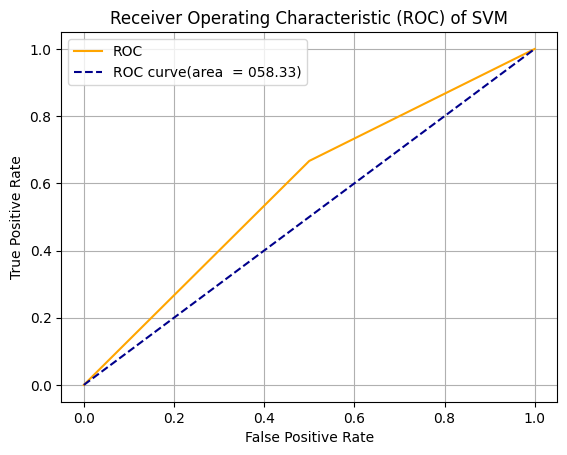

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1],[0,1], color='darkblue', linestyle='--', label='ROC curve(area  = 0%.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM' )
plt.legend()
plt.grid()
plt.show()